In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from yellowbrick.classifier import ConfusionMatrix
from sklearn.preprocessing import LabelEncoder
# metodo de amostragem holdout
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from skopt import BayesSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


In [80]:
train = pd.read_csv(r"c:\Users\Laura\Downloads\titanic\train.csv", sep=",")

In [81]:
train.tail(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [82]:
colunas = [col for col in train.columns if col != 'Survived'] + ['Survived']
train = train[colunas]

train

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


In [83]:
classificacao = train.columns[-1]
np.unique(train[classificacao].astype(str), return_counts=True)

(array(['0', '1'], dtype=object), array([549, 342]))

<Axes: xlabel='Survived', ylabel='count'>

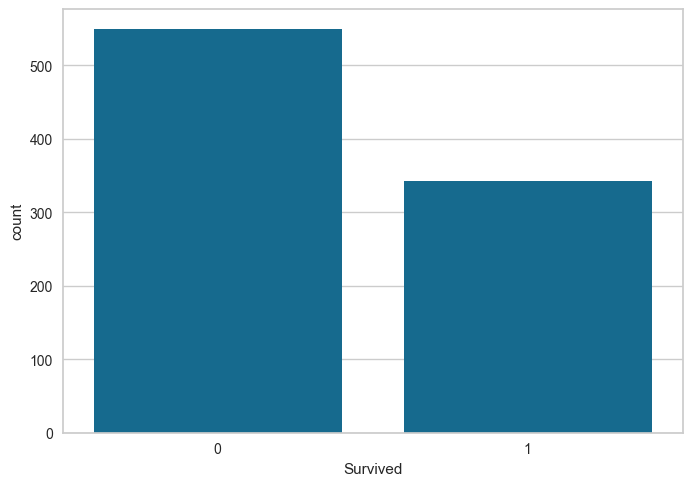

In [84]:
sns.countplot(x=train["Survived"])


In [85]:
train.drop('PassengerId', axis=1, inplace= True)
train.drop('Ticket', axis=1, inplace= True)
train.drop('Cabin', axis=1, inplace= True)
train.drop('Name', axis = 1, inplace=True)
train.drop('Embarked', axis = 1, inplace=True)

In [86]:
train["Age"] = train["Age"].fillna(train["Age"].mean()).round(2) # media

In [87]:
cols_label_encode = ['Sex']
train[cols_label_encode] = train[cols_label_encode].apply(lambda col: LabelEncoder().fit_transform(col))
train

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,1,22.0,1,0,7.2500,0
1,1,0,38.0,1,0,71.2833,1
2,3,0,26.0,0,0,7.9250,1
3,1,0,35.0,1,0,53.1000,1
4,3,1,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,0
887,1,0,19.0,0,0,30.0000,1
888,3,0,29.7,1,2,23.4500,0
889,1,1,26.0,0,0,30.0000,1


In [88]:
train['Age'].fillna(train['Age'].mean(), inplace= True) # substituir valores nulos pela media

C:\Users\Laura\AppData\Local\Temp\ipykernel_19376\2361405008.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Age'].fillna(train['Age'].mean(), inplace= True) # substituir valores nulos pela media


In [89]:
cols_onehot_encode = ['Pclass']

# inicializar o oneHotEncoder (sparse_output=False retorna um array denso)
onehot = OneHotEncoder(sparse_output=False)

# aplicar o oneHotEncoder apenas nas colunas categoricas
df_onehot = onehot.fit_transform(train[cols_onehot_encode])

# obter os novos nomes das colunas após codificação
nomeColuna = onehot.get_feature_names_out(cols_onehot_encode)

#criar um dataFrame com os dados codificados e as novas colunas
df_onehot = pd.DataFrame(df_onehot, columns=nomeColuna)

# combinar as colunas codificadas com as colunas que não foram transformadas
train_encoded = pd.concat([df_onehot, train.drop(columns = cols_onehot_encode)], axis=1)

In [90]:
train_encoded

,Pclass_1,Pclass_2,Pclass_3,Sex,Age,SibSp,Parch,Fare,Survived
0,0.0,0.0,1.0,1,22.0,1,0,7.2500,0
1,1.0,0.0,0.0,0,38.0,1,0,71.2833,1
2,0.0,0.0,1.0,0,26.0,0,0,7.9250,1
3,1.0,0.0,0.0,0,35.0,1,0,53.1000,1
4,0.0,0.0,1.0,1,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...,...
886,0.0,1.0,0.0,1,27.0,0,0,13.0000,0
887,1.0,0.0,0.0,0,19.0,0,0,30.0000,1
888,0.0,0.0,1.0,0,29.7,1,2,23.4500,0
889,1.0,0.0,0.0,1,26.0,0,0,30.0000,1


In [91]:
# quant de opçoes de respostas
train_encoded.nunique()


Pclass_1      2
Pclass_2      2
Pclass_3      2
Sex           2
Age          89
SibSp         7
Parch         7
Fare        248
Survived      2
dtype: int64

In [92]:
train_encoded.shape

(891, 9)

In [93]:
x_prev = train_encoded.iloc[:, :-1]
y_classe = train_encoded.iloc[:, -1]

In [94]:
x_prev

,Pclass_1,Pclass_2,Pclass_3,Sex,Age,SibSp,Parch,Fare
0,0.0,0.0,1.0,1,22.0,1,0,7.2500
1,1.0,0.0,0.0,0,38.0,1,0,71.2833
2,0.0,0.0,1.0,0,26.0,0,0,7.9250
3,1.0,0.0,0.0,0,35.0,1,0,53.1000
4,0.0,0.0,1.0,1,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
886,0.0,1.0,0.0,1,27.0,0,0,13.0000
887,1.0,0.0,0.0,0,19.0,0,0,30.0000
888,0.0,0.0,1.0,0,29.7,1,2,23.4500
889,1.0,0.0,0.0,1,26.0,0,0,30.0000


In [95]:
y_classe

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [96]:
y_classe.shape

(891,)

In [97]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x_prev, y_classe, test_size = 0.20, random_state = 42)

In [98]:
x_treino.shape

(712, 8)

In [99]:
x_teste.shape


(179, 8)

In [100]:
x_teste

,Pclass_1,Pclass_2,Pclass_3,Sex,Age,SibSp,Parch,Fare
709,0.0,0.0,1.0,1,29.7,1,1,15.2458
439,0.0,1.0,0.0,1,31.0,0,0,10.5000
840,0.0,0.0,1.0,1,20.0,0,0,7.9250
720,0.0,1.0,0.0,0,6.0,0,1,33.0000
39,0.0,0.0,1.0,0,14.0,1,0,11.2417
...,...,...,...,...,...,...,...,...
433,0.0,0.0,1.0,1,17.0,0,0,7.1250
773,0.0,0.0,1.0,1,29.7,0,0,7.2250
25,0.0,0.0,1.0,0,38.0,1,5,31.3875
84,0.0,1.0,0.0,0,17.0,0,0,10.5000


In [101]:
y_teste

709    1
439    0
840    0
720    1
39     1
      ..
433    0
773    0
25     1
84     1
10     1
Name: Survived, Length: 179, dtype: int64

In [102]:
y_treino

331    0
733    0
382    0
704    0
813    0
      ..
106    1
270    0
860    0
435    1
102    0
Name: Survived, Length: 712, dtype: int64

In [103]:
parametros = {
    "criterion": ["gini", "entropy"],  
    "max_depth": [3, 5, 10, 15, None],  
    "min_samples_split": [2, 5, 10, 20, 50],  
    "min_samples_leaf": [1, 2, 4, 10] ,
    "max_features": [None, 'sqrt', 'log2', 0.2, 0.4, 0.6, 0.8]
}



In [113]:
bayes = BayesSearchCV(estimator=DecisionTreeClassifier(), search_spaces=parametros, cv=5, scoring="accuracy", n_iter=20,  n_jobs=-1, verbose=1)
bayes.fit(x_treino, y_treino)

print("Melhores parâmetros (BayesSearchCV):", bayes.best_params_)
print("Acurácia:", accuracy_score(y_teste, bayes.best_estimator_.predict(x_teste)))


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

In [105]:
bayes= DecisionTreeClassifier(criterion= 'entropy', max_depth = 5, max_features= None, min_samples_leaf= 10, min_samples_split= 20)
bayes.fit(x_treino, y_treino)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=10,
                       min_samples_split=20)

In [106]:
previsoes = bayes.predict(x_teste)
previsoes

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1])

In [107]:
y_teste

709    1
439    0
840    0
720    1
39     1
      ..
433    0
773    0
25     1
84     1
10     1
Name: Survived, Length: 179, dtype: int64

In [108]:
accuracy_score(y_teste,previsoes)

0.7653631284916201

In [109]:
confusion_matrix(y_teste, previsoes)

array([[97,  8],
       [34, 40]])

c:\Users\Laura\Python\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.7653631284916201

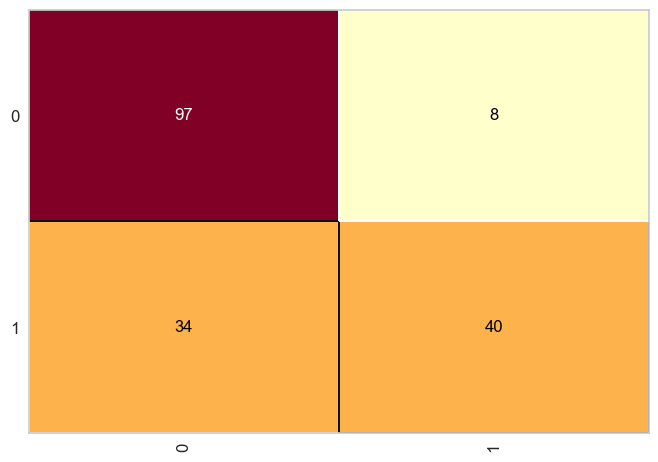

In [110]:
cm = ConfusionMatrix(bayes)
cm.fit(x_treino, y_treino)
cm.score(x_teste, y_teste)

In [111]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

           0       0.74      0.92      0.82       105
           1       0.83      0.54      0.66        74

    accuracy                           0.77       179
   macro avg       0.79      0.73      0.74       179
weighted avg       0.78      0.77      0.75       179



Text(0.5, 1.0, 'BayesSearchCV')

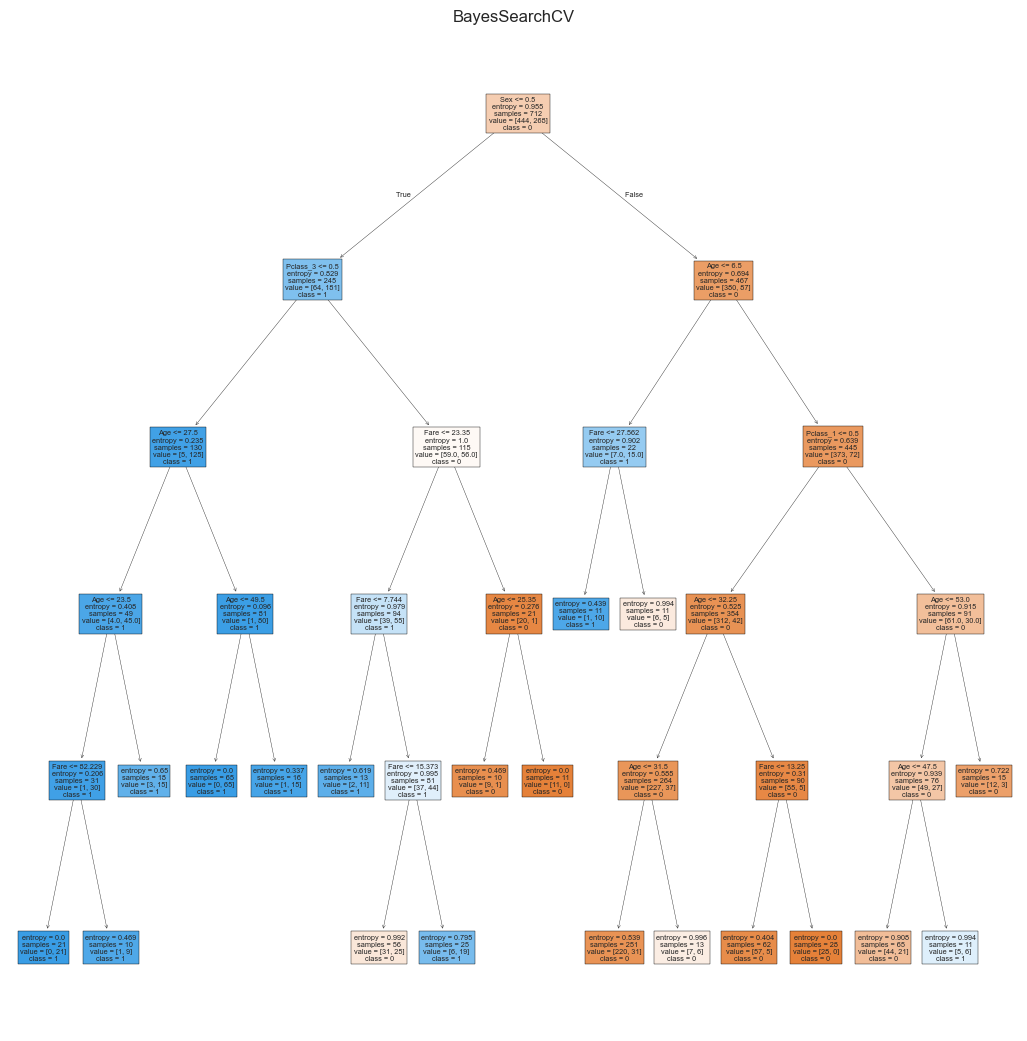

In [112]:
previsores = x_treino.columns

figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(13,13))
tree.plot_tree(bayes, feature_names=previsores, class_names=[str(c) for c in bayes.classes_], filled=True)

eixos.set_title('BayesSearchCV')